In [2]:
!pip install requests pillow

In [3]:
import requests
from PIL import Image, ImageDraw
import io

In [4]:
# Replace with your Computer Vision API endpoint and key
endpoint = "https://vision-for-practice.cognitiveservices.azure.com/"
subscription_key = "<key deleted for security purpose, but insert your own subscription key here>"

In [5]:
# URL of the image or path to an image file you want to analyze
image_path = "kids_playing_soccer.png"

# Open the image file and convert it to binary data
with open(image_path, "rb") as image_file:
    image_data = image_file.read()

In [6]:
# Set up the endpoint for object detection
analyze_url = endpoint + "vision/v3.2/analyze"
headers = {
    "Ocp-Apim-Subscription-Key": subscription_key,
    "Content-Type": "application/octet-stream"
}
params = {
    "visualFeatures": "Objects"
}

In [7]:
# Make the request to the API
response = requests.post(analyze_url, headers=headers, params=params, data=image_data)
response.raise_for_status()

In [8]:
# Parse the results
analysis = response.json()
objects = analysis["objects"]

In [9]:
# Print detected objects
for obj in objects:
    print(f"Object: {obj['object']}, Confidence: {obj['confidence']}, "
          f"Bounding Box: {obj['rectangle']}")

Object: sports ball, Confidence: 0.634, Bounding Box: {'x': 98, 'y': 212, 'w': 30, 'h': 26}
Object: soccer ball, Confidence: 0.832, Bounding Box: {'x': 256, 'y': 389, 'w': 73, 'h': 65}
Object: person, Confidence: 0.694, Bounding Box: {'x': 169, 'y': 87, 'w': 69, 'h': 156}
Object: person, Confidence: 0.891, Bounding Box: {'x': 263, 'y': 59, 'w': 305, 'h': 394}


In [10]:
import matplotlib.pyplot as plt

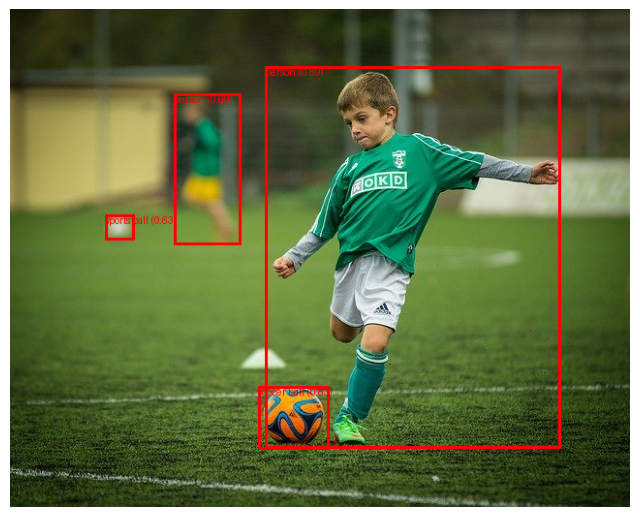

In [11]:
# Draw bounding boxes on the image as before
image = Image.open(io.BytesIO(image_data))
draw = ImageDraw.Draw(image)
for obj in objects:
    rect = obj["rectangle"]
    left = rect["x"]
    top = rect["y"]
    right = left + rect["w"]
    bottom = top + rect["h"]
    draw.rectangle([left, top, right, bottom], outline="red", width=3)
    draw.text((left, top), f"{obj['object']} ({obj['confidence']:.2f})", fill="red")

# Display the image inline
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")
plt.show()